In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan.csv')
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [4]:
x = df.gender
y = df.income

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
categorical_cols = ['gender', 'occupation', 'education_level', 'marital_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [7]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
y = df_encoded['loan_status']

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [12]:
print(f'Train accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')

Train accuracy: 1.00
Test accuracy: 1.00


In [13]:
from sklearn import tree
text = tree.export_text(model)

In [14]:
text

'|--- feature_1 <= 53500.00\n|   |--- class: Denied\n|--- feature_1 >  53500.00\n|   |--- class: Approved\n'

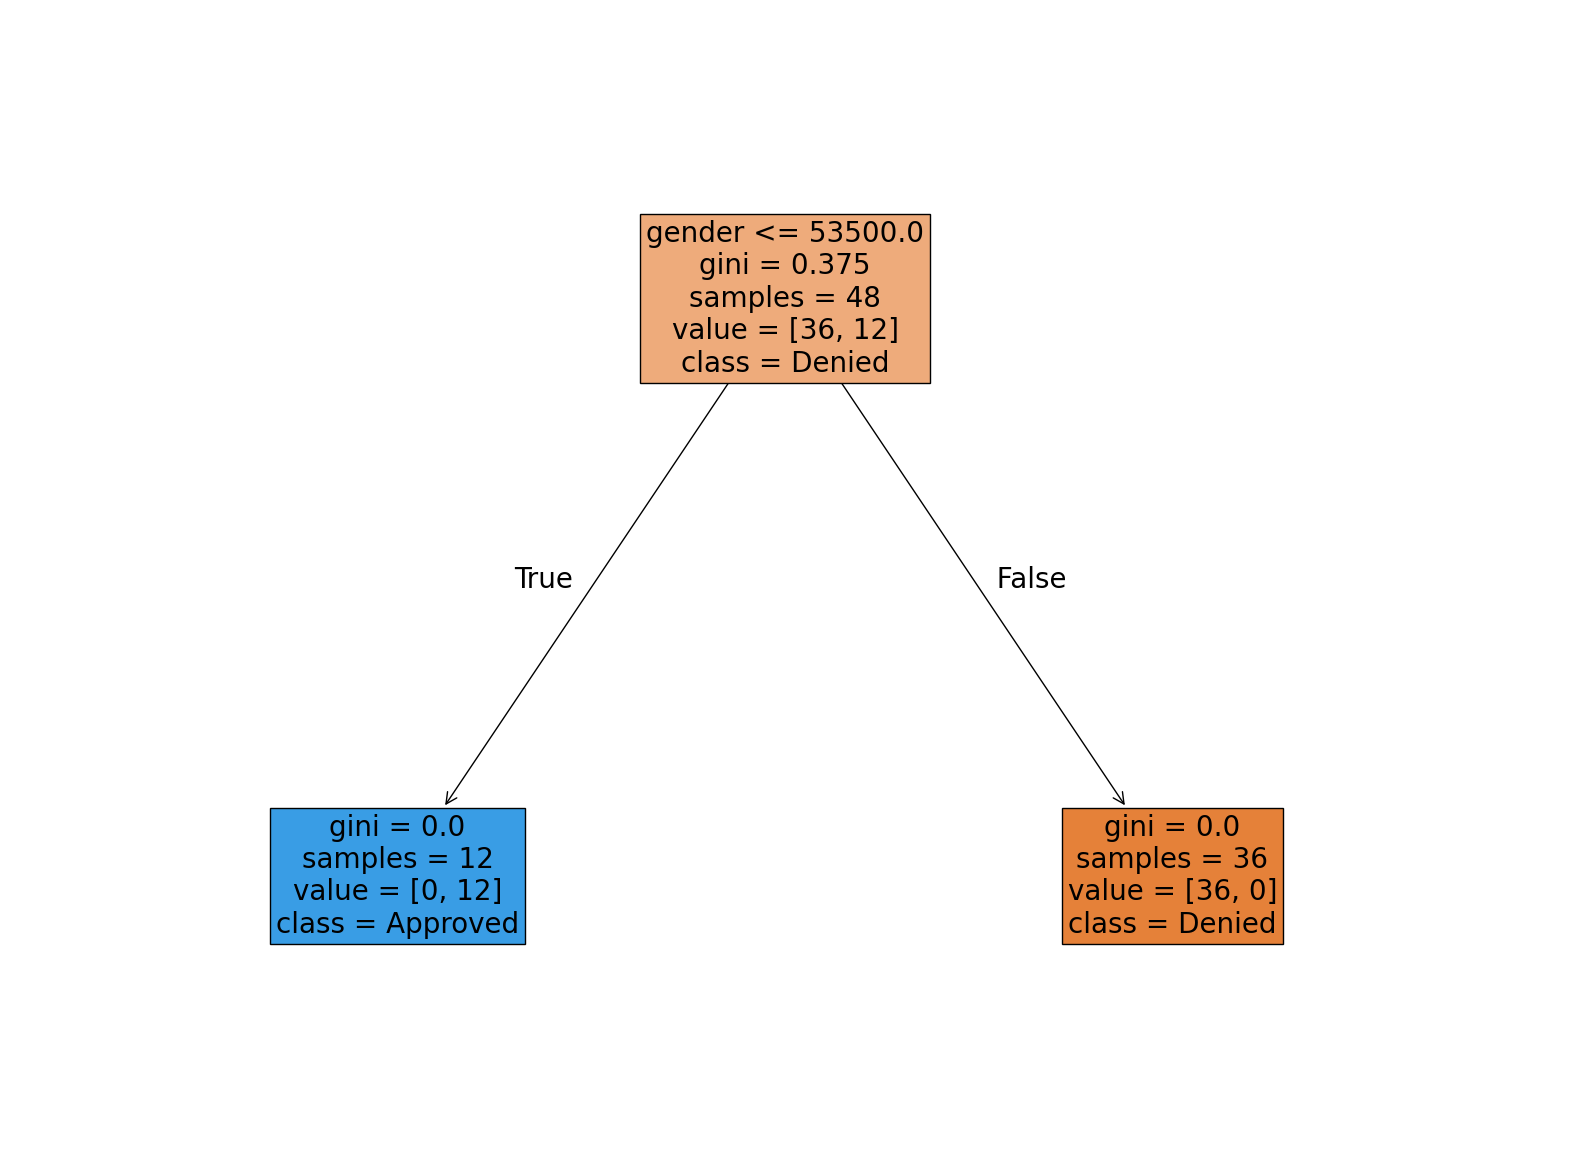

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 15)) 
tree.plot_tree(model, 
               feature_names=['age', 'gender', 'occupation', 'education_level', 'marital_status', 'income', 'credit_score'], 
               class_names=['Denied', 'Approved'], 
               filled=True,
               fontsize=20) 
plt.show()